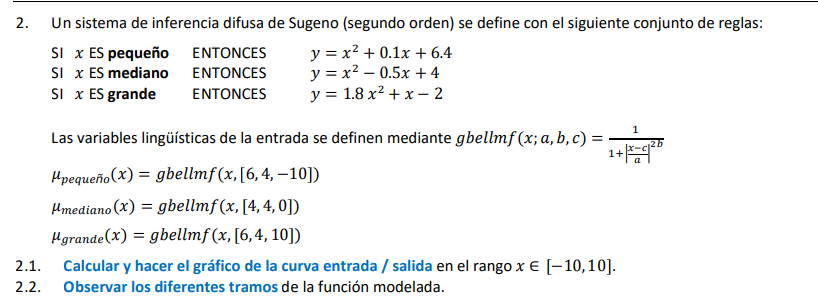



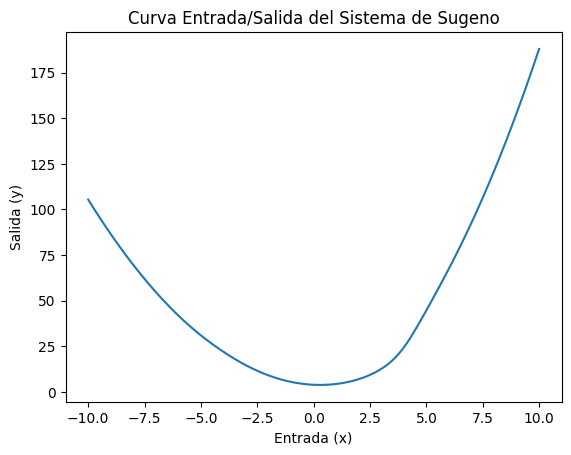

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def gbellmf(x, parameters):
    """
    Función de membresía gbellmf.

    Args:
        x: Valor de entrada.
        parameters: Lista con los parámetros [a, b, c] de la función.

    Returns:
        Valor de la función de membresía.
    """
    a, b, c = parameters
    return 1 / (1 + abs((x - c) / a) ** (2 * b))

def sugeno_system(x):
    """
    Calcula la salida del sistema de inferencia difusa de Sugeno.

    Args:
        x: Valor de entrada.

    Returns:
        Valor de salida.
    """
    # Calcular grados de activación
    mu_pequeño = gbellmf(x, [6, 4, -10])
    mu_mediano = gbellmf(x, [4, 4, 0])
    mu_grande = gbellmf(x, [6, 4, 10])

    # Calcular salida de cada regla
    y_pequeño = x**2 + 0.1 * x + 6.4
    y_mediano = x**2 - 0.5 * x + 4
    y_grande = 1.8 * x**2 + x - 2

    # Combinar salidas de las reglas
    y = (mu_pequeño * y_pequeño + mu_mediano * y_mediano + mu_grande * y_grande) / (mu_pequeño + mu_mediano + mu_grande)

    return y

# Generar valores de entrada
x_range = np.linspace(-10, 10, 100)

# Calcular valores de salida
y_values = [sugeno_system(x) for x in x_range]

# Graficar la curva entrada/salida
plt.plot(x_range, y_values)
plt.xlabel('Entrada (x)')
plt.ylabel('Salida (y)')
plt.title('Curva Entrada/Salida del Sistema de Sugeno')
plt.show()